**Data Augmentation Comparison**

Import Library

In [ ]:
from utils import fashionmnist_dataloader,train, val
from utils import ResNet18

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
# baseline cnn model for fashion mnist
import numpy as np

import matplotlib.pyplot as plt


import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import Adam


**1. Initialize Device**

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

device

device(type='cuda')

*CutMix*

In [ ]:
# Define CutMix Dataloader
batch_size = 50

train_loader, val_loader, test_loader = fashionmnist_dataloader(batch_size,basic_aug = False)

100%|██████████| 26421880/26421880 [00:01<00:00, 16542978.58it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 298203.20it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5499470.33it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 10080428.10it/s]
/opt/conda/lib/python3.10/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 26421880/26421880 [00:01<00:00, 16650054.43it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 300916.36it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5560862.65it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 22515408.75it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Define model

In [ ]:
num_classes = 10

In [ ]:
# For CutMix
criterion = nn.CrossEntropyLoss()
model = ResNet18(num_classes).to(device)
optimizer = Adam(model.parameters(), lr=3e-4)

model

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 192MB/s]


ResNet18(
  (model): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runn

*Start training* **( T^T )**

CutMix part

In [ ]:
#CutMix
num_epochs=10
print("Basic Resnet-18")
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []

for epoch in range(1, num_epochs + 1):
        train_acc, train_loss = train(model, criterion, train_loader, optimizer, epoch, device)
        test_acc, test_loss = val(model, criterion, val_loader, device)

        train_accuracies.append(train_acc)
        train_losses.append(train_loss)
        test_accuracies.append(test_acc)
        test_losses.append(test_loss)


Basic Resnet-18
Train Epoch: 1	Average Loss: 0.513625	Accuracy: 84.79%
Val Loss: 0.3510, Val Accuracy: 87.42%
Train Epoch: 2	Average Loss: 0.248733	Accuracy: 91.30%
Val Loss: 0.2292, Val Accuracy: 91.66%
Train Epoch: 3	Average Loss: 0.207170	Accuracy: 92.74%
Val Loss: 0.2957, Val Accuracy: 89.45%
Train Epoch: 4	Average Loss: 0.180216	Accuracy: 93.70%
Val Loss: 0.2288, Val Accuracy: 91.91%
Train Epoch: 5	Average Loss: 0.160318	Accuracy: 94.33%
Val Loss: 0.2001, Val Accuracy: 92.84%
Train Epoch: 6	Average Loss: 0.142305	Accuracy: 94.96%
Val Loss: 0.1910, Val Accuracy: 93.18%
Train Epoch: 7	Average Loss: 0.127227	Accuracy: 95.48%
Val Loss: 0.2035, Val Accuracy: 92.54%
Train Epoch: 8	Average Loss: 0.107077	Accuracy: 96.28%
Val Loss: 0.1800, Val Accuracy: 93.69%
Train Epoch: 9	Average Loss: 0.092213	Accuracy: 96.82%
Val Loss: 0.1912, Val Accuracy: 93.35%
Train Epoch: 10	Average Loss: 0.073183	Accuracy: 97.43%
Val Loss: 0.2244, Val Accuracy: 92.97%


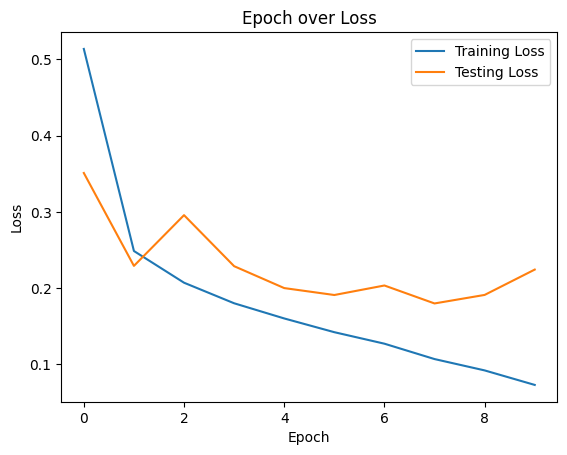

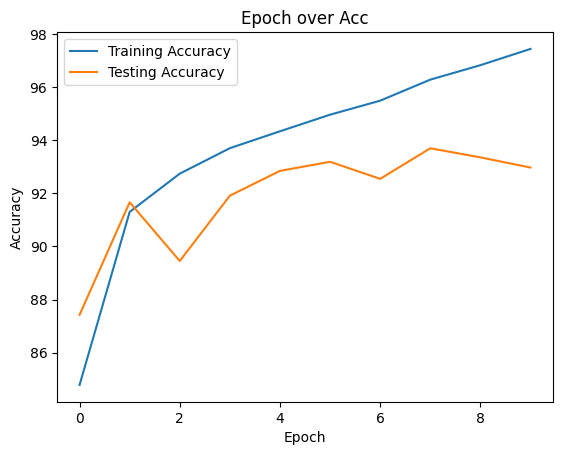

In [ ]:
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Testing Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Epoch over Loss")
plt.show()


plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(test_accuracies, label="Testing Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Epoch over Acc")
plt.legend()
plt.show()